# Modifying borders of tissues
When segmenting clumbs of objects, such as cells in an organoid, it may happen that the segmented cells at the tissue border, touching the background are not segmented properly. In order to modify only those, it may make sense to post-process a label image by only modifying the object borders close by the background.

In [1]:
import pyclesperanto_prototype as cle

# import a function from a file in the same folder
from simulated_cell_clumb import simulate_data

For demonstrating it we simulate a clumb of cells.

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
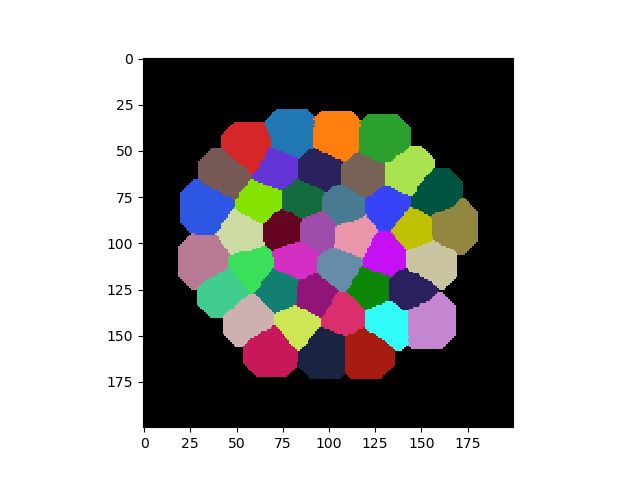

In [2]:
cells = simulate_data()
cells

We can erode the entire field of labels as if it was a binary image, while keeping the pixels labeled. With this, only the labels at the border to the background are modified.

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
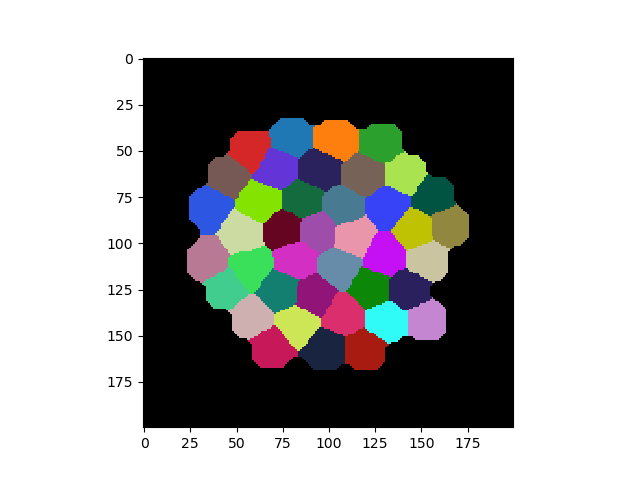

In [3]:
eroded_cells = cle.erode_connected_labels(cells, radius=5)
eroded_cells

Just to compare, how this is different from label erosion:

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
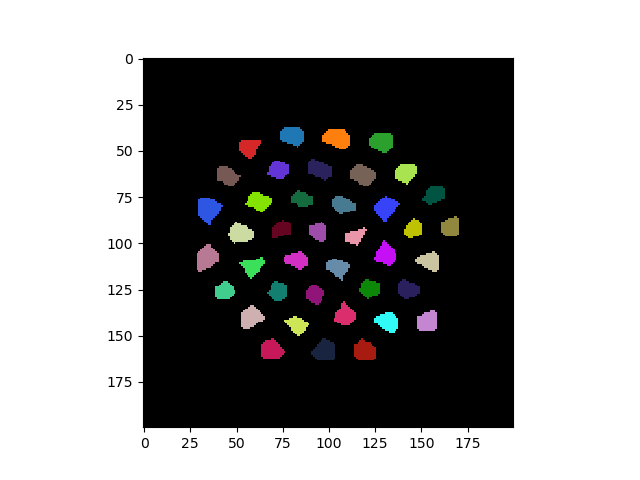

In [4]:
eroded_cells2 = cle.erode_labels(eroded_cells, radius=5)
eroded_cells2